In [1]:
import _sqlite3
import pandas as pd
import numpy as np

cnx = _sqlite3.connect("corpus.sqlite3")

In [2]:
comments_df = pd.read_sql_query("Select ID_Post, Headline, Body FROM Posts",cnx)
labels_df = pd.read_sql_query("SELECT * From Annotations_consolidated",cnx)

In [3]:
labels = ["ArgumentsUsed","Discriminating","Inappropriate","OffTopic","PersonalStories","PossiblyFeedback","SentimentNegative","SentimentNeutral","SentimentPositive"]

label_map = {y:x for (x,y) in enumerate(labels)}

In [4]:
comments_df

,ID_Post,Headline,Body
0,1,,
1,2,"Newsletter ""DER STANDARD""",Ich bin begeistert von den STANDARD - Newslett...
2,3,Auch begeistert...,... Aber momentan funktioniert das Abmelden od...
3,4,Abmeldeprobleme,Es ist ganz einfach nervend!\r\nVor kurzem hab...
4,5,,und sie als mitarbeiter sind natuerlich objektiv
...,...,...,...
1011768,1011769,None,zwischen der beendigung eines arbeitsverhältni...
1011769,1011770,None,du sagst es ja im namen selbst: wegen eindicku...
1011770,1011771,None,Was genau haben Sie denn nicht verstanden? Ich...
1011771,1011772,None,irgendwie widersprechen Sie sich in Ihrem Post...


In [5]:
labels_df.value_counts("ID_Post").isin([9])

ID_Post
432258      True
136446      True
136458      True
136457      True
136456      True
           ...  
17999      False
18001      False
18006      False
18007      False
1010997    False
Length: 11773, dtype: bool

In [6]:
index_values_of_9_label_posts = labels_df.value_counts("ID_Post")[labels_df.value_counts("ID_Post").isin([9])].index
len(index_values_of_9_label_posts)

3599

In [7]:
# Die Kommentare, für die alle 9 Labels annotiert wurden:
comments_filtered_df =comments_df.loc[index_values_of_9_label_posts]


In [8]:
# Anfügen der Spalten für jedes Label in comments_filtered_df
for label in labels:
    comments_filtered_df[label] = np.zeros(len(index_values_of_9_label_posts))

In [9]:
# Setzen der Labels in comments_filtered_df
index_values = set(index_values_of_9_label_posts)
for index,row in labels_df.iterrows():
    if row["ID_Post"] in index_values:
        # cur_label = label_map[row["Category"]]
        # cur_label_value = row["Value"]

        comments_filtered_df.at[row["ID_Post"],row["Category"]] = row["Value"]

comments_filtered_df

,ID_Post,Headline,Body,ArgumentsUsed,Discriminating,Inappropriate,OffTopic,PersonalStories,PossiblyFeedback,SentimentNegative,SentimentNeutral,SentimentPositive
ID_Post,,,,,,,,,,,,
432258,432259,None,"Das kann man nur mutmaßen, aber nicht erkennen...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
136446,136447,None,Sorry für die verursachte Mühe der Löschungen.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
136458,136459,None,"Witzig, dass der Poster selber nicht widerspro...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
136457,136458,None,Foggwulf und Mouilly haben es Ihnen ja schon e...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
136456,136457,None,"was auch erklärt, warum körperlich schwächere ...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
875899,875900,None,Das beste Mittel gegen die angebliche Hetze si...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
875937,875938,None,Frankreich und Portugal haben ihnen angeboten ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
875900,875901,Video an sehen,die Stinkefinger sind schon ausgefahren.... \r...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [10]:
#Drop the ID_Post-column
comments_filtered_df=comments_filtered_df.drop("ID_Post",axis=1)

In [11]:
#Verteilung der Label-Werte nach Label:
for label in labels:
    print(comments_filtered_df.value_counts(label))

ArgumentsUsed
0.0    2577
1.0    1022
dtype: int64
Discriminating
0.0    3317
1.0     282
dtype: int64
Inappropriate
0.0    3296
1.0     303
dtype: int64
OffTopic
0.0    3019
1.0     580
dtype: int64
PersonalStories
0.0    3552
1.0      47
dtype: int64
PossiblyFeedback
0.0    3527
1.0      72
dtype: int64
SentimentNegative
0.0    1908
1.0    1691
dtype: int64
SentimentNeutral
1.0    1865
0.0    1734
dtype: int64
SentimentPositive
0.0    3556
1.0      43
dtype: int64


In [13]:
correlation_matrix = np.zeros((len(labels),len(labels)))

for label1 in labels:
    for label2 in labels:
        if (label1 == label2):
            continue
        two_argument_view = comments_filtered_df[[label1,label2]]

        sum = 0
        for index, row in two_argument_view.iterrows():
            sum += row[label1]*row[label2]

        avgl1l2 = sum/comments_filtered_df.shape[0]


        sum = 0
        for index, row in comments_filtered_df[[label1]].iterrows():
            sum += row[label1]

        avgl1 = sum/comments_filtered_df.shape[0]


        sum = 0
        for index, row in comments_filtered_df[[label2]].iterrows():
            sum += row[label2]

        avgl2 = sum/comments_filtered_df.shape[0]

        corl1l2 = avgl1l2-avgl1*avgl2
        jkl = ((label_map[label1],label_map[label2]),corl1l2)
        correlation_matrix.itemset((label_map[label1],label_map[label2]),corl1l2)

# Covariance matrix of the 9 features:
cor_mat = correlation_matrix+np.diag(np.ones(9))
cor_mat

array([[ 1.00000000e+00, -1.39146737e-02, -1.14037883e-02,
        -2.77025023e-02,  4.34940674e-03, -1.51310902e-03,
        -6.22921637e-02,  6.34621037e-02, -1.16994000e-03],
       [-1.39146737e-02,  1.00000000e+00,  2.57249378e-03,
        -4.84744574e-03, -1.02325358e-03, -1.28968244e-03,
         3.95947564e-02, -3.86585882e-02, -9.36168169e-04],
       [-1.14037883e-02,  2.57249378e-03,  1.00000000e+00,
         1.14392246e-02, -1.09945332e-03,  1.37213565e-03,
         4.18545765e-02, -4.08486937e-02, -1.00588282e-03],
       [-2.77025023e-02, -4.84744574e-03,  1.14392246e-02,
         1.00000000e+00, -1.27099922e-03,  2.05523114e-03,
         1.37497673e-02, -1.21021700e-02, -1.64759730e-03],
       [ 4.34940674e-03, -1.02325358e-03, -1.09945332e-03,
        -1.27099922e-03,  1.00000000e+00, -2.61256233e-04,
        -5.30232804e-03,  4.06908127e-03,  1.23324677e-03],
       [-1.51310902e-03, -1.28968244e-03,  1.37213565e-03,
         2.05523114e-03, -2.61256233e-04,  1.000000

array([[ 1.00000000e+00, -1.39146737e-02, -1.14037883e-02,
        -2.77025023e-02,  4.34940674e-03, -1.51310902e-03,
        -6.22921637e-02,  6.34621037e-02, -1.16994000e-03],
       [-1.39146737e-02,  1.00000000e+00,  2.57249378e-03,
        -4.84744574e-03, -1.02325358e-03, -1.28968244e-03,
         3.95947564e-02, -3.86585882e-02, -9.36168169e-04],
       [-1.14037883e-02,  2.57249378e-03,  1.00000000e+00,
         1.14392246e-02, -1.09945332e-03,  1.37213565e-03,
         4.18545765e-02, -4.08486937e-02, -1.00588282e-03],
       [-2.77025023e-02, -4.84744574e-03,  1.14392246e-02,
         1.00000000e+00, -1.27099922e-03,  2.05523114e-03,
         1.37497673e-02, -1.21021700e-02, -1.64759730e-03],
       [ 4.34940674e-03, -1.02325358e-03, -1.09945332e-03,
        -1.27099922e-03,  1.00000000e+00, -2.61256233e-04,
        -5.30232804e-03,  4.06908127e-03,  1.23324677e-03],
       [-1.51310902e-03, -1.28968244e-03,  1.37213565e-03,
         2.05523114e-03, -2.61256233e-04,  1.000000

In [14]:
# We see that the labels are nearly uncorrelated, with exception of the label pair (6,7) [SentimentNegative,SentimentNeutral], which however goes to show that the definition of what exactly makes a comment be of negative sentiment is rather unclear.

# The labels corresponding with the numbers of the matrix:
label_map

{'ArgumentsUsed': 0,
 'Discriminating': 1,
 'Inappropriate': 2,
 'OffTopic': 3,
 'PersonalStories': 4,
 'PossiblyFeedback': 5,
 'SentimentNegative': 6,
 'SentimentNeutral': 7,
 'SentimentPositive': 8}

In [15]:
# two_argument_view = comments_filtered_df[[label1,label2]]
# index, row = next(comments_filtered_df[[label1]].iterrows())
#
# row[label2]

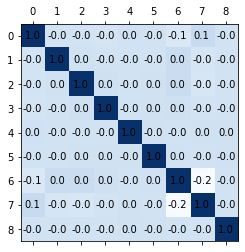

In [20]:
from matplotlib import pyplot as plt

correlation_matrix = np.zeros((len(labels),len(labels)))

for label1 in labels:
    for label2 in labels:
        if (label1 == label2):
            continue
        two_argument_view = comments_filtered_df[[label1,label2]]

        sum = 0
        for index, row in two_argument_view.iterrows():
            sum += row[label1]*row[label2]

        avgl1l2 = sum/comments_filtered_df.shape[0]


        sum = 0
        for index, row in comments_filtered_df[[label1]].iterrows():
            sum += row[label1]

        avgl1 = sum/comments_filtered_df.shape[0]


        sum = 0
        for index, row in comments_filtered_df[[label2]].iterrows():
            sum += row[label2]

        avgl2 = sum/comments_filtered_df.shape[0]

        corl1l2 = avgl1l2-avgl1*avgl2
        jkl = ((label_map[label1],label_map[label2]),corl1l2)
        correlation_matrix.itemset((label_map[label1],label_map[label2]),corl1l2)

# Covariance matrix of the 9 features:
cor_mat = correlation_matrix+np.diag(np.ones(9))
fig, ax = plt.subplots()

ax.matshow(cor_mat, cmap=plt.cm.Blues)

for i in range(9):
    for j in range(9):
        c = cor_mat[j,i]
        ax.text(i, j, "{:0.1f}".format(c), va='center', ha='center')


In [25]:

with open("Correlation_Matrix_rounded_two_one_digit.png","wb") as a:
    fig.savefig(a)